# Crypto vs the Market

## Initial project setup

In [174]:
# Initial imports
import os
import pandas as pd
import hvplot.pandas
import pandas_ta as ta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [175]:
# Load the environment variables from the .env file
load_dotenv()

True

In [176]:
# Set the variables for the Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [177]:
# Create the Alpaca API REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "V2"
)

## Alpaca API Data Import

#### Market Data

In [178]:
# Set ticker to SPY
tickers = "SPY"

# Set timeframe to 1Day
timeframe = "1Day"

# Set the start and end date
start_date = pd.Timestamp("2018-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()

In [179]:
# Use Alpaca get_bars function to get data for SPY
spy_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Concatenate the ticker dataframe
spy_prices_df = pd.concat([spy_prices_df], axis=1, keys=["SPY"])

# Use .head() to verify
spy_prices_df.head()

SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2018-07-02 04:00:00+00:00  269.51  272.04  269.240  271.86  63769156   
2018-07-03 04:00:00+00:00  272.88  272.98  270.420  270.90  42201071   
2018-07-05 04:00:00+00:00  272.16  273.18  270.960  273.11  57441049   
2018-07-06 04:00:00+00:00  273.14  275.84  272.715  275.42  66693896   
2018-07-09 04:00:00+00:00  276.56  277.96  276.500  277.90  51771719   

                                                   
                          trade_count        vwap  
timestamp                                          
2018-07-02 04:00:00+00:00      279127  270.689557  
2018-07-03 04:00:00+00:00      180591  271.716151  
2018-07-05 04:00:00+00:00      260592  272.247814  
2018-07-06 04:00:00+00:00      269826  274.929843  
2018-07-09 04:00:00+00:00      212828  277.260701

#### Market Data Sim

In [180]:
# Set ticker to SPY
tickers = "SPY"

# Set timeframe to 1Day
timeframe = "1Day"

# Set the start and end date (Assume 2-20-2020 is first day of Covid pandemic)
start_date = pd.Timestamp("2018-02-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-02-20", tz="America/New_York").isoformat()

# Set 2 year forecast end date for comparing actual returns
forecast_date = pd.Timestamp("2022-02-20", tz="America/New_York").isoformat()

In [181]:
# Use Alpaca get_bars function to get data for SPY
spy_prices_covid_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Use Alpaca get_bars function to get data for SPY to compare actuals to simulated returns
spy_actuals_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = end_date,
    end = forecast_date,
).df

# Concatenate the ticker dataframe
spy_prices_covid_df = pd.concat([spy_prices_covid_df], axis=1, keys=["SPY"])

# verify first and last 5 records
spy_prices_covid_df

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2018-02-20 05:00:00+00:00  272.00  273.6700  270.5000  271.40   87542178   
2018-02-21 05:00:00+00:00  271.85  274.7200  269.9400  270.05   99118727   
2018-02-22 05:00:00+00:00  271.09  273.0500  269.6400  270.40  110763169   
2018-02-23 05:00:00+00:00  271.84  274.7100  271.2500  274.71   93601887   
2018-02-26 05:00:00+00:00  275.90  278.0100  275.2600  277.90   87824222   
...                           ...       ...       ...     ...        ...   
2020-02-13 05:00:00+00:00  335.92  338.1200  335.5600  337.06   54496102   
2020-02-14 05:00:00+00:00  337.48  337.7300  336.2000  337.60   64582210   
2020-02-18 05:00:00+00:00  336.52  337.6677  335.2100  336.73   57342529   
2020-02-19 05:00:00+00:00  337.81  339.0800  337.4800  338.34   49765222   
2020-02-20 05:00:00+00:00  337.77  338.6400  333.6817  336.95   74170562   

                                                   
                          trade_count        vwap  
timestamp                                          
2018-02-20 05:00:00+00:00      339897  272.115919  
2018-02-21 05:00:00+00:00      392252  271.984676  
2018-02-22 05:00:00+00:00      404227  270.918163  
2018-02-23 05:00:00+00:00      321920  273.222367  
2018-02-26 05:00:00+00:00      281802  276.766722  
...                               ...         ...  
2020-02-13 05:00:00+00:00      287288  337.048796  
2020-02-14 05:00:00+00:00      252426  337.149473  
2020-02-18 05:00:00+00:00      286927  336.556062  
2020-02-19 05:00:00+00:00      221058  338.258804  
2020-02-20 05:00:00+00:00      431813  336.373228  

[504 rows x 7 columns]

In [182]:
# Calculate actual cumulative returns for SPY since pandemic
spy_actuals_df = (1 + spy_actuals_df["close"].pct_change().dropna()).cumprod()
spy_actuals_df

timestamp
2020-02-21 05:00:00+00:00    0.989702
2020-02-24 05:00:00+00:00    0.956878
2020-02-25 05:00:00+00:00    0.927882
2020-02-26 05:00:00+00:00    0.924470
2020-02-27 05:00:00+00:00    0.882950
                               ...   
2022-02-14 05:00:00+00:00    1.302923
2022-02-15 05:00:00+00:00    1.323935
2022-02-16 05:00:00+00:00    1.325419
2022-02-17 05:00:00+00:00    1.297166
2022-02-18 05:00:00+00:00    1.288945
Name: close, Length: 505, dtype: float64

#### Crypto Data

In [183]:
# Set ticker to BTCUSD
tickers = "BTCUSD"

# Set timeframe to 1Day
timeframe = "1Day"

# Set the start and end date
start_date = pd.Timestamp("2018-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()

In [184]:
# Use the Alpaca get_crypto_bars function to get data for BTCUSD
btc_prices_df = alpaca.get_crypto_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Filter out all exchanges other than Coinbase and drop redundant exchange column
btc_prices_df = btc_prices_df[btc_prices_df.exchange == "CBSE"]
btc_prices_df = btc_prices_df.drop(axis=1, columns="exchange")

# Concatenate the ticker dataframe
btc_prices_df = pd.concat([btc_prices_df], axis=1, keys=["BTCUSD"])

# Use .head() to verify
btc_prices_df.head()

BTCUSD                                          \
                              open     high      low    close       volume   
timestamp                                                                    
2018-07-01 05:00:00+00:00  6349.50  6351.00  6270.01  6304.55   643.082606   
2018-07-02 05:00:00+00:00  6304.55  6669.99  6270.01  6611.79  7184.664968   
2018-07-03 05:00:00+00:00  6502.62  6518.25  6411.51  6469.00  1325.274215   
2018-07-04 05:00:00+00:00  6587.46  6700.00  6508.72  6620.99  1345.963438   
2018-07-05 05:00:00+00:00  6621.00  6684.00  6449.50  6532.95  4944.828533   

                                                    
                          trade_count         vwap  
timestamp                                           
2018-07-01 05:00:00+00:00       61723  6325.628835  
2018-07-02 05:00:00+00:00       37641  6556.943445  
2018-07-03 05:00:00+00:00        9573  6463.236479  
2018-07-04 05:00:00+00:00       57950  6606.931106  
2018-07-05 05:00:00+00:00       43786  6565.028002

#### Crypto Data Sim

In [185]:
# Set ticker to BTCUSD
tickers = "BTCUSD"

# Set timeframe to 1Day
timeframe = "1Day"

# Set the start and end date (Assume 2-20-2020 is first day of Covid pandemic)
start_date = pd.Timestamp("2018-02-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-02-20", tz="America/New_York").isoformat()

# Set 2 year forecast end date for comparing actual returns
forecast_date = pd.Timestamp("2022-02-21", tz="America/New_York").isoformat() # NEED TO ADD EXTRA DAY FOR LEAP YEAR

In [186]:
# Use the Alpaca get_crypto_bars function to get data for BTCUSD
btc_prices_covid_df = alpaca.get_crypto_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Use Alpaca get_crypto_bars function to get data for BTC to compare actuals to simulated returns
btc_actuals_df = alpaca.get_crypto_bars(
    tickers,
    timeframe,
    start = end_date,
    end = forecast_date,
).df

# Filter out all exchanges other than Coinbase and drop redundant exchange column
btc_prices_covid_df = btc_prices_covid_df[btc_prices_covid_df.exchange == "CBSE"]
btc_prices_covid_df = btc_prices_covid_df.drop(axis=1, columns="exchange")

btc_actuals_df = btc_actuals_df[btc_actuals_df.exchange == "CBSE"]
btc_actuals_df = btc_actuals_df.drop(axis=1, columns="exchange")

# Concatenate the ticker dataframe
btc_prices_covid_df = pd.concat([btc_prices_covid_df], axis=1, keys=["BTCUSD"])

# verify first and last 5 records
btc_prices_covid_df

BTCUSD                                \
                               open      high       low     close   
timestamp                                                           
2018-02-20 06:00:00+00:00  11235.57  11279.99  10650.00  10824.54   
2018-02-21 06:00:00+00:00  10824.54  11180.02  10250.00  10454.27   
2018-02-22 06:00:00+00:00  10793.01  10900.00   9715.27   9830.00   
2018-02-23 06:00:00+00:00  10144.99  10494.14  10109.00  10445.44   
2018-02-24 06:00:00+00:00  10445.44  10489.26   9372.72   9688.62   
...                             ...       ...       ...       ...   
2020-02-15 06:00:00+00:00   9911.22  10048.34   9856.12   9955.13   
2020-02-16 06:00:00+00:00   9920.52   9969.38   9707.99   9774.14   
2020-02-17 06:00:00+00:00   9700.00   9818.60   9635.84   9797.19   
2020-02-18 06:00:00+00:00  10188.04  10205.05  10112.28  10139.63   
2020-02-19 06:00:00+00:00   9593.48   9653.10   9479.19   9564.27   

                                                                   
                                 volume trade_count          vwap  
timestamp                                                          
2018-02-20 06:00:00+00:00  11175.461666       39045  10972.179893  
2018-02-21 06:00:00+00:00  16412.543664       62848  10603.722137  
2018-02-22 06:00:00+00:00  21180.658071       72211  10060.526301  
2018-02-23 06:00:00+00:00   4004.525634       16801  10362.638161  
2018-02-24 06:00:00+00:00  14362.150847       56627   9767.080204  
...                                 ...         ...           ...  
2020-02-15 06:00:00+00:00   1921.723180       13488   9981.502135  
2020-02-16 06:00:00+00:00   1868.943917       16573   9822.869803  
2020-02-17 06:00:00+00:00   2002.907268       14631   9748.514957  
2020-02-18 06:00:00+00:00   2025.978187       13561  10154.892617  
2020-02-19 06:00:00+00:00   3817.853056       20791   9567.428585  

[730 rows x 7 columns]

In [187]:
# Calculate actual cumulative returns for BTC since pandemic
btc_actuals_df = (1 + btc_actuals_df["close"].pct_change().dropna()).cumprod()
btc_actuals_df

timestamp
2020-02-21 06:00:00+00:00    1.000305
2020-02-22 06:00:00+00:00    1.021388
2020-02-23 06:00:00+00:00    1.008246
2020-02-24 06:00:00+00:00    0.985770
2020-02-25 06:00:00+00:00    0.948018
                               ...   
2022-02-16 06:00:00+00:00    4.502453
2022-02-17 06:00:00+00:00    4.194971
2022-02-18 06:00:00+00:00    4.154331
2022-02-19 06:00:00+00:00    4.061540
2022-02-20 06:00:00+00:00    4.049293
Name: close, Length: 731, dtype: float64

## Bitcoin vs the S&P500: Long-Term - Jason

## Bitcoin vs the S&P500: Trading - Majid

#### SPY

In [188]:
# Define 14-Day EMA for SPY
ema14_spy = ta.ema(spy_prices_df["SPY"]["close"], length=14)

# Define 28-Day EMA for SPY
ema28_spy = ta.ema(spy_prices_df["SPY"]["close"], length=28)

In [189]:
# Plot the closing prices for the S&P 500 with the 14-Day EMA and 28-Day EMA
spy_prices_df["SPY"]["close"].hvplot(
    title="S&P 500 Closing Prices with 14-Day EMA and 28-Day EMA",
    xlabel="Timestamp",
    ylabel="Price",
    height=500,
    width=1000
) * ema14_spy.hvplot() * ema28_spy.hvplot()

:Overlay
   .Curve.Close  :Curve   [timestamp]   (close)
   .Curve.EMA_14 :Curve   [timestamp]   (EMA_14)
   .Curve.EMA_28 :Curve   [timestamp]   (EMA_28)

In [190]:
# Convert the 14-Day and 28-Day EMA data into dataframes
ema14_spy_df = pd.DataFrame(ema14_spy)
ema28_spy_df = pd.DataFrame(ema28_spy)

# Add the EMA data to the primary indicator dataframe
spy_indicators = pd.concat([spy_prices_df["SPY"], ema14_spy_df, ema28_spy_df], axis=1)

# Use .tail() to verify
spy_indicators.tail()

,open,high,low,close,volume,trade_count,vwap,EMA_14,EMA_28
timestamp,,,,,,,,,
2022-06-27 04:00:00+00:00,391.12,391.3600,387.44,388.59,65967268,552197,389.085434,385.220172,392.900689
2022-06-28 04:00:00+00:00,390.30,393.1600,380.53,380.65,86376255,641197,384.912075,384.610816,392.055814
2022-06-29 04:00:00+00:00,381.16,382.2700,378.42,380.34,64478427,519970,380.393953,384.041374,391.247827
2022-06-30 04:00:00+00:00,376.27,380.6582,372.56,377.25,112269284,799487,377.083807,383.135857,390.282459
2022-07-01 04:00:00+00:00,376.60,381.7000,373.80,381.24,74165514,601221,378.221516,382.883076,389.658842


In [191]:
# Create lists and trigger for the buy and sell signal loop
buy_signals = []
sell_signals = []
trigger = 0

# Create a for loop to identify EMA overlaps and create either a buy or sell signal at that point. If 14-Day crosses above 28-Day, create a buy signal. If 14-Day crosses below 28-Day, create a sell signal. Create "NaN" values otherwise.
for x in range(len(spy_indicators["close"])):
    if spy_indicators["EMA_14"].iloc[x] >= spy_indicators["EMA_28"].iloc[x] and trigger != 1:
        buy_signals.append(spy_indicators["close"].iloc[x])
        sell_signals.append(float("NaN"))
        trigger = 1
    elif spy_indicators["EMA_14"].iloc[x] <= spy_indicators["EMA_28"].iloc[x] and trigger != -1:
        buy_signals.append(float("NaN"))
        sell_signals.append(spy_indicators["close"].iloc[x])
        trigger = -1
    else:
        buy_signals.append(float("NaN"))
        sell_signals.append(float("NaN"))

In [192]:
# Add the buy and sell signals to the primary indicator dataframe. NaN values are normal in the EMA_14, EMA_28, buy_signals, and sell_signals columns
spy_indicators["buy_signals"] = buy_signals
spy_indicators["sell_signals"] = sell_signals

# Use .tail() to verify
spy_indicators.tail()

,open,high,low,close,volume,trade_count,vwap,EMA_14,EMA_28,buy_signals,sell_signals
timestamp,,,,,,,,,,,
2022-06-27 04:00:00+00:00,391.12,391.3600,387.44,388.59,65967268,552197,389.085434,385.220172,392.900689,NaN,NaN
2022-06-28 04:00:00+00:00,390.30,393.1600,380.53,380.65,86376255,641197,384.912075,384.610816,392.055814,NaN,NaN
2022-06-29 04:00:00+00:00,381.16,382.2700,378.42,380.34,64478427,519970,380.393953,384.041374,391.247827,NaN,NaN
2022-06-30 04:00:00+00:00,376.27,380.6582,372.56,377.25,112269284,799487,377.083807,383.135857,390.282459,NaN,NaN
2022-07-01 04:00:00+00:00,376.60,381.7000,373.80,381.24,74165514,601221,378.221516,382.883076,389.658842,NaN,NaN


In [193]:
# Plot the close, 14-Day EMA and 28-Day EMA as well as a scatter plot of buy and sell signals
spy_indicators.hvplot(
    x="timestamp",
    y=["close", "EMA_14", "EMA_28"],
    title="S&P 500 Closing Prices with 14-Day EMA, 28-Day EMA, and Signals",
    xlabel="Timestamp",
    ylabel="Price",
    height=500,
    width=1000
) * spy_indicators.hvplot.scatter(
    y=["buy_signals", "sell_signals"],
    line_width=5
)

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Scatter   [timestamp]   (value)

In [194]:
# Create buy and sell signal lists to hold the cleaned values. NaN values removed.
buy_signals_clean = []
sell_signals_clean = []

# Use a for loop to append any value above 1 from the original buy signal list to the new buy signal list
for x in buy_signals:
    if x > 1:
        buy_signals_clean.append(x)
    else:
        pass

# Use a for loop to append any value above 1 from the original sell signal list to the new sell signal list
for x in sell_signals:
    if x > 1:
        sell_signals_clean.append(x)
    else:
        pass

# Create a dataframe out of the cleaned signal lists
signals = pd.DataFrame([buy_signals_clean, sell_signals_clean])

# Verify data
signals

,0,1,2,3,4,5,6,7,8,9
0,285.07,266.46,289.58,298.05,298.4,281.59,340.76,350.24,450.64,450.48
1,278.30,285.06,287.80,290.42,311.5,326.97,329.98,433.63,456.49,438.06


In [195]:
# Find the difference between the buy and sell signals aka the profit or loss of each trade
difference = signals.diff(axis=0)

# Append the new difference values to the signals dataframe
signals = signals.append(difference, ignore_index=True)

# Verify data
signals

,0,1,2,3,4,5,6,7,8,9
0,285.07,266.46,289.58,298.05,298.4,281.59,340.76,350.24,450.64,450.48
1,278.30,285.06,287.80,290.42,311.5,326.97,329.98,433.63,456.49,438.06
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-6.77,18.60,-1.78,-7.63,13.1,45.38,-10.78,83.39,5.85,-12.42


In [196]:
# Remove the unneeded 3rd row
signals = signals.drop([2])

# Verify data
signals

,0,1,2,3,4,5,6,7,8,9
0,285.07,266.46,289.58,298.05,298.4,281.59,340.76,350.24,450.64,450.48
1,278.30,285.06,287.80,290.42,311.5,326.97,329.98,433.63,456.49,438.06
3,-6.77,18.60,-1.78,-7.63,13.1,45.38,-10.78,83.39,5.85,-12.42


In [197]:
# Rename the indexes to appropriate names for readability
signals = signals.rename(index = {0: "Buy Signal", 1: "Sell Signal", 3: "P&L $"})

# Verify data
signals

,0,1,2,3,4,5,6,7,8,9
Buy Signal,285.07,266.46,289.58,298.05,298.4,281.59,340.76,350.24,450.64,450.48
Sell Signal,278.30,285.06,287.80,290.42,311.5,326.97,329.98,433.63,456.49,438.06
P&L $,-6.77,18.60,-1.78,-7.63,13.1,45.38,-10.78,83.39,5.85,-12.42


In [198]:
# Find the difference between the starting price and ending price of the S&P 500 over the selected time period
spy_profit = spy_indicators["close"][-1] - spy_indicators["close"][0]

# Verify data
spy_profit

109.38

In [199]:
# Find the sum of trades made between the starting point and ending point for the S&P 500 over the selected time period
spy_profit_trade = signals.iloc[2].sum()

# Verify data
spy_profit_trade

126.94000000000017

In [200]:
# Find the percentage difference between the profits and trading profits
spy_profit_diff = (spy_profit_trade - spy_profit) / spy_profit * 100
spy_profit_diff

16.05412324008061

In [201]:
# Use f print statements to relay information about profitability
print(f"A long-term investment in the S&P 500 from 07-01-2018 to 07-01-2022 would have generated ${spy_profit:.2f} in profits per share while a simple 14-Day & 28-Day EMA trading strategy would have generated ${spy_profit_trade:.2f} in profits per share.")
print(f"Trading would have resulted in {spy_profit_diff:.2f}% more profit over holding long-term.")

A long-term investment in the S&P 500 from 07-01-2018 to 07-01-2022 would have generated $109.38 in profits per share while a simple 14-Day & 28-Day EMA trading strategy would have generated $126.94 in profits per share.
Trading would have resulted in 16.05% more profit over holding long-term.


#### BTCUSD

In [202]:
# Define 14-Day EMA for BTCUSD
ema14_btc = ta.ema(btc_prices_df["BTCUSD"]["close"], length=14)

# Define 28-Day EMA for BTCUSD
ema28_btc = ta.ema(btc_prices_df["BTCUSD"]["close"], length=28)

In [203]:
# Plot the closing prices for Bitcoin with the 14-Day EMA and 28-Day EMA
btc_prices_df["BTCUSD"]["close"].hvplot(
    title="Bitcoin Closing Prices with 14-Day EMA and 28-Day EMA",
    xlabel="Timestamp",
    ylabel="Price",
    height=500,
    width=1000
) * ema14_btc.hvplot() * ema28_btc.hvplot()

:Overlay
   .Curve.Close  :Curve   [timestamp]   (close)
   .Curve.EMA_14 :Curve   [timestamp]   (EMA_14)
   .Curve.EMA_28 :Curve   [timestamp]   (EMA_28)

In [204]:
# Convert the 14-Day and 28-Day EMA data into dataframes
ema14_btc_df = pd.DataFrame(ema14_btc)
ema28_btc_df = pd.DataFrame(ema28_btc)

# Add the EMA data to the primary indicator dataframe
btc_indicators = pd.concat([btc_prices_df["BTCUSD"], ema14_btc_df, ema28_btc_df], axis=1)

# Use .tail() to verify
btc_indicators.tail()

,open,high,low,close,volume,trade_count,vwap,EMA_14,EMA_28
timestamp,,,,,,,,,
2022-06-26 05:00:00+00:00,21416.41,21866.00,20912.07,21238.56,12470.612235,459005,21289.867672,21944.766564,24246.474620
2022-06-27 05:00:00+00:00,21237.19,21520.00,20461.91,20750.48,17664.933829,551532,20895.749869,21785.528355,24005.371543
2022-06-28 05:00:00+00:00,20752.02,21189.99,20122.83,20280.74,16517.605222,550251,20587.194432,21584.889908,23748.500402
2022-06-29 05:00:00+00:00,20278.61,20410.91,19823.43,20025.96,17130.447175,566701,20073.589943,21377.032587,23491.773477
2022-06-30 05:00:00+00:00,20028.61,20879.99,18603.00,19372.13,35409.472733,817794,19433.309448,21109.712242,23207.660134


In [205]:
# Create lists and trigger for the buy and sell signal loop
buy_signals = []
sell_signals = []
trigger = 0

# Create a for loop to identify EMA overlaps and create either a buy or sell signal at that point. If 14-Day crosses above 28-Day, create a buy signal. If 14-Day crosses below 28-Day, create a sell signal. Create "NaN" values otherwise.
for x in range(len(btc_indicators["close"])):
    if btc_indicators["EMA_14"].iloc[x] >= btc_indicators["EMA_28"].iloc[x] and trigger != 1:
        buy_signals.append(btc_indicators["close"].iloc[x])
        sell_signals.append(float("NaN"))
        trigger = 1
    elif btc_indicators["EMA_14"].iloc[x] <= btc_indicators["EMA_28"].iloc[x] and trigger != -1:
        buy_signals.append(float("NaN"))
        sell_signals.append(btc_indicators["close"].iloc[x])
        trigger = -1
    else:
        buy_signals.append(float("NaN"))
        sell_signals.append(float("NaN"))

In [206]:
# Add the buy and sell signals to the primary indicator dataframe. NaN values are normal in the EMA_14, EMA_28, buy_signals, and sell_signals columns
btc_indicators["buy_signals"] = buy_signals
btc_indicators["sell_signals"] = sell_signals

# Use .tail() to verify
btc_indicators.tail()

,open,high,low,close,volume,trade_count,vwap,EMA_14,EMA_28,buy_signals,sell_signals
timestamp,,,,,,,,,,,
2022-06-26 05:00:00+00:00,21416.41,21866.00,20912.07,21238.56,12470.612235,459005,21289.867672,21944.766564,24246.474620,NaN,NaN
2022-06-27 05:00:00+00:00,21237.19,21520.00,20461.91,20750.48,17664.933829,551532,20895.749869,21785.528355,24005.371543,NaN,NaN
2022-06-28 05:00:00+00:00,20752.02,21189.99,20122.83,20280.74,16517.605222,550251,20587.194432,21584.889908,23748.500402,NaN,NaN
2022-06-29 05:00:00+00:00,20278.61,20410.91,19823.43,20025.96,17130.447175,566701,20073.589943,21377.032587,23491.773477,NaN,NaN
2022-06-30 05:00:00+00:00,20028.61,20879.99,18603.00,19372.13,35409.472733,817794,19433.309448,21109.712242,23207.660134,NaN,NaN


In [207]:
# Plot the close, 14-Day EMA and 28-Day EMA as well as a scatter plot of buy and sell signals
btc_indicators.hvplot(
    x="timestamp",
    y=["close", "EMA_14", "EMA_28"],
    title="Bitcoin Closing Prices with 14-Day EMA, 28-Day EMA, and Signals",
    xlabel="Timestamp",
    ylabel="Price",
    height=500,
    width=1000
) * btc_indicators.hvplot.scatter(
    y=["buy_signals", "sell_signals"],
    line_width=5
)

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Scatter   [timestamp]   (value)

In [208]:
# Create buy and sell signal lists to hold the cleaned values. NaN values removed.
buy_signals_clean = []
sell_signals_clean = []

# Use a for loop to append any value above 1 from the original buy signal list to the new buy signal list
for x in buy_signals:
    if x > 1:
        buy_signals_clean.append(x)
    else:
        pass

# Use a for loop to append any value above 1 from the original sell signal list to the new sell signal list
for x in sell_signals:
    if x > 1:
        sell_signals_clean.append(x)
    else:
        pass

# Create a dataframe out of the cleaned signal lists
signals = pd.DataFrame([buy_signals_clean, sell_signals_clean])

# Verify data
signals

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,8192.09,7015.0,4025.69,3677.05,11579.09,9422.59,7877.17,7261.76,9513.87,11057.07,58126.74,37262.77,49181.94,43917.95,43341.39,41875.48
1,6106.28,6188.0,3617.39,10323.39,10217.79,8467.01,8708.89,9155.42,10419.14,49138.85,50477.63,42422.84,57474.25,39248.58,39016.63,40140.57


In [209]:
# Find the difference between the buy and sell signals aka the profit or loss of each trade
difference = signals.diff(axis=0)

# Append the new difference values to the signals dataframe
signals = signals.append(difference, ignore_index=True)

# Verify data
signals

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,8192.09,7015.0,4025.69,3677.05,11579.09,9422.59,7877.17,7261.76,9513.87,11057.07,58126.74,37262.77,49181.94,43917.95,43341.39,41875.48
1,6106.28,6188.0,3617.39,10323.39,10217.79,8467.01,8708.89,9155.42,10419.14,49138.85,50477.63,42422.84,57474.25,39248.58,39016.63,40140.57
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2085.81,-827.0,-408.30,6646.34,-1361.30,-955.58,831.72,1893.66,905.27,38081.78,-7649.11,5160.07,8292.31,-4669.37,-4324.76,-1734.91


In [210]:
# Remove the unneeded 3rd row
signals = signals.drop([2])

# Verify data
signals

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,8192.09,7015.0,4025.69,3677.05,11579.09,9422.59,7877.17,7261.76,9513.87,11057.07,58126.74,37262.77,49181.94,43917.95,43341.39,41875.48
1,6106.28,6188.0,3617.39,10323.39,10217.79,8467.01,8708.89,9155.42,10419.14,49138.85,50477.63,42422.84,57474.25,39248.58,39016.63,40140.57
3,-2085.81,-827.0,-408.30,6646.34,-1361.30,-955.58,831.72,1893.66,905.27,38081.78,-7649.11,5160.07,8292.31,-4669.37,-4324.76,-1734.91


In [211]:
# Rename the indexes to appropriate names for readability
signals = signals.rename(index = {0: "Buy Signal", 1: "Sell Signal", 3: "P&L $"})

# Verify data
signals

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Buy Signal,8192.09,7015.0,4025.69,3677.05,11579.09,9422.59,7877.17,7261.76,9513.87,11057.07,58126.74,37262.77,49181.94,43917.95,43341.39,41875.48
Sell Signal,6106.28,6188.0,3617.39,10323.39,10217.79,8467.01,8708.89,9155.42,10419.14,49138.85,50477.63,42422.84,57474.25,39248.58,39016.63,40140.57
P&L $,-2085.81,-827.0,-408.30,6646.34,-1361.30,-955.58,831.72,1893.66,905.27,38081.78,-7649.11,5160.07,8292.31,-4669.37,-4324.76,-1734.91


In [212]:
# Find the difference between the starting price and ending price of Bitcoin over the selected time period
btc_profit = btc_indicators["close"][-1] - btc_indicators["close"][0]

# Verify data
btc_profit

13067.580000000002

In [213]:
# Find the sum of trades made between the starting point and ending point for Bitcoin over the selected time period
btc_profit_trade = signals.iloc[2].sum()

# Verify data
btc_profit_trade

37795.009999999995

In [214]:
# Find the percentage difference between the profits and trading profits
btc_profit_diff = (btc_profit_trade - btc_profit) / btc_profit * 100
btc_profit_diff

189.2273091115569

In [215]:
# Use f print statements to relay information about profitability
print(f"A long-term investment in Bitcoin from 07-01-2018 to 07-01-2022 would have generated ${btc_profit:.2f} in profits per coin while a simple 14-Day & 28-Day EMA trading strategy would have generated ${btc_profit_trade:.2f} in profits per coin.")
print(f"Trading would have resulted in {btc_profit_diff:.2f}% more profit over holding long-term.")

A long-term investment in Bitcoin from 07-01-2018 to 07-01-2022 would have generated $13067.58 in profits per coin while a simple 14-Day & 28-Day EMA trading strategy would have generated $37795.01 in profits per coin.
Trading would have resulted in 189.23% more profit over holding long-term.


## Bitcoin vs the S&P500: Monte Carlo Simulations

#### SPY

In [216]:
# Configure the Monte Carlo simulation to forecast 4 years of SPY data
MC_SPY_4 = MCSimulation(
    portfolio_data = spy_prices_df,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252 * 4
)

# Review the simulation input data
MC_SPY_4.portfolio_data

SPY                                        \
                             open      high      low   close     volume   
timestamp                                                                 
2018-07-02 04:00:00+00:00  269.51  272.0400  269.240  271.86   63769156   
2018-07-03 04:00:00+00:00  272.88  272.9800  270.420  270.90   42201071   
2018-07-05 04:00:00+00:00  272.16  273.1800  270.960  273.11   57441049   
2018-07-06 04:00:00+00:00  273.14  275.8400  272.715  275.42   66693896   
2018-07-09 04:00:00+00:00  276.56  277.9600  276.500  277.90   51771719   
...                           ...       ...      ...     ...        ...   
2022-06-27 04:00:00+00:00  391.12  391.3600  387.440  388.59   65967268   
2022-06-28 04:00:00+00:00  390.30  393.1600  380.530  380.65   86376255   
2022-06-29 04:00:00+00:00  381.16  382.2700  378.420  380.34   64478427   
2022-06-30 04:00:00+00:00  376.27  380.6582  372.560  377.25  112269284   
2022-07-01 04:00:00+00:00  376.60  381.7000  373.800  381.24   74165514   

                                                                
                          trade_count        vwap daily_return  
timestamp                                                       
2018-07-02 04:00:00+00:00      279127  270.689557          NaN  
2018-07-03 04:00:00+00:00      180591  271.716151    -0.003531  
2018-07-05 04:00:00+00:00      260592  272.247814     0.008158  
2018-07-06 04:00:00+00:00      269826  274.929843     0.008458  
2018-07-09 04:00:00+00:00      212828  277.260701     0.009004  
...                               ...         ...          ...  
2022-06-27 04:00:00+00:00      552197  389.085434    -0.003820  
2022-06-28 04:00:00+00:00      641197  384.912075    -0.020433  
2022-06-29 04:00:00+00:00      519970  380.393953    -0.000814  
2022-06-30 04:00:00+00:00      799487  377.083807    -0.008124  
2022-07-01 04:00:00+00:00      601221  378.221516     0.010577  

[1008 rows x 8 columns]

In [217]:
# Run the Monte Carlo simulation to forecast 4 years cumulative returns
MC_SPY_4.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


KeyboardInterrupt: 

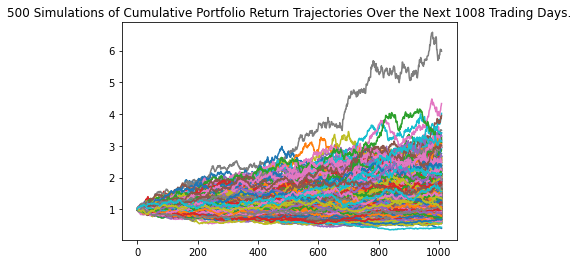

In [ ]:
# Visualize the 4 year Monte Carlo simulation with a line plot
MC_SPY_4_plot = MC_SPY_4.plot_simulation()

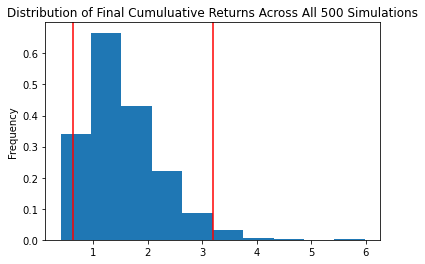

In [ ]:
# Visualize the probability distribution of the 4 year Monte Carlo simulation
MC_SPY_4_dist = MC_SPY_4.plot_distribution()

In [ ]:
# Generate summary statistics from the 4 year Monte Carlo simulation
MC_SPY_4_stats = MC_SPY_4.summarize_cumulative_return()

In [ ]:
# Review the summary statistics
print(MC_SPY_4_stats)

count           500.000000
mean              1.547739
std               0.695685
min               0.401783
25%               1.026586
50%               1.428760
75%               1.940784
max               5.981966
95% CI Lower      0.621596
95% CI Upper      3.189669
Name: 1008, dtype: float64


#### BTCUSD

In [ ]:
# Configure the Monte Carlo simulation to forecast 4 years of BTCUSD data
MC_BTC_4 = MCSimulation(
    portfolio_data = btc_prices_df,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 365 * 4
)

# Review the simulation input data
MC_BTC_4.portfolio_data

BTCUSD                                \
                               open      high       low     close   
timestamp                                                           
2018-07-01 05:00:00+00:00   6349.50   6351.00   6270.01   6304.55   
2018-07-02 05:00:00+00:00   6304.55   6669.99   6270.01   6611.79   
2018-07-03 05:00:00+00:00   6502.62   6518.25   6411.51   6469.00   
2018-07-04 05:00:00+00:00   6587.46   6700.00   6508.72   6620.99   
2018-07-05 05:00:00+00:00   6621.00   6684.00   6449.50   6532.95   
...                             ...       ...       ...       ...   
2022-06-26 05:00:00+00:00  21416.41  21866.00  20912.07  21238.56   
2022-06-27 05:00:00+00:00  21237.19  21520.00  20461.91  20750.48   
2022-06-28 05:00:00+00:00  20752.02  21189.99  20122.83  20280.74   
2022-06-29 05:00:00+00:00  20278.61  20410.91  19823.43  20025.96   
2022-06-30 05:00:00+00:00  20028.61  20879.99  18603.00  19372.13   

                                                                                
                                 volume trade_count          vwap daily_return  
timestamp                                                                       
2018-07-01 05:00:00+00:00    643.082606       61723   6325.628835          NaN  
2018-07-02 05:00:00+00:00   7184.664968       37641   6556.943445     0.048733  
2018-07-03 05:00:00+00:00   1325.274215        9573   6463.236479    -0.021596  
2018-07-04 05:00:00+00:00   1345.963438       57950   6606.931106     0.023495  
2018-07-05 05:00:00+00:00   4944.828533       43786   6565.028002    -0.013297  
...                                 ...         ...           ...          ...  
2022-06-26 05:00:00+00:00  12470.612235      459005  21289.867672    -0.008170  
2022-06-27 05:00:00+00:00  17664.933829      551532  20895.749869    -0.022981  
2022-06-28 05:00:00+00:00  16517.605222      550251  20587.194432    -0.022638  
2022-06-29 05:00:00+00:00  17130.447175      566701  20073.589943    -0.012563  
2022-06-30 05:00:00+00:00  35409.472733      817794  19433.309448    -0.032649  

[1461 rows x 8 columns]

In [ ]:
# Run the Monte Carlo simulation to forecast 4 years cumulative returns
MC_BTC_4.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/majidkouki/Desktop/fintech_workspace/fintech_challenges/crypto-vs-the-market/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992315,0.982795,1.020956,0.957325,1.010372,0.971716,1.008532,0.990393,0.962121,0.917171,...,1.025513,1.066529,1.007532,1.006056,1.000165,1.012864,1.052095,1.019740,0.992284,0.984372
2,0.921486,1.004274,1.039869,1.076178,0.987162,0.967928,1.000837,0.995641,0.962860,0.918230,...,1.019560,1.051100,1.015244,1.033556,1.003572,1.068277,0.990304,1.016599,1.047037,0.990253
3,0.925190,1.035341,0.985523,1.084843,0.991648,0.904227,0.990770,1.002302,0.903587,0.950937,...,1.056470,1.019817,1.025444,1.065930,1.050301,1.046421,0.959955,1.007581,1.040682,1.067655
4,0.969980,1.040421,0.911461,1.131068,0.978537,0.938963,1.008763,0.959354,0.845047,0.957371,...,1.060519,0.983023,0.998036,1.076639,1.031827,1.001831,0.997518,0.989824,1.017168,1.111750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1.642825,1.157599,4.263796,7.313627,1.210523,4.580988,7.868281,21.314195,1.377327,3.504191,...,0.991028,1.840760,3.977020,5.530952,16.186378,2.451783,2.786641,11.577977,1.277898,0.364873
1457,1.537886,1.131557,4.402634,7.290571,1.223785,4.638264,7.667585,22.673998,1.435456,3.577452,...,0.936643,1.718683,4.047865,5.503206,16.136886,2.473074,2.787399,11.540447,1.346428,0.354958
1458,1.494138,1.155104,4.371615,6.865619,1.191780,4.809314,7.785358,22.544768,1.407573,3.252143,...,0.966011,1.753369,4.086737,5.131561,15.553975,2.476676,2.820446,10.609063,1.372960,0.372923
1459,1.547545,1.176434,4.569244,6.848780,1.146179,5.182090,7.593922,22.273108,1.452617,3.192817,...,0.916399,1.801830,4.138813,4.807817,15.369439,2.469835,2.839377,10.689648,1.390634,0.378772


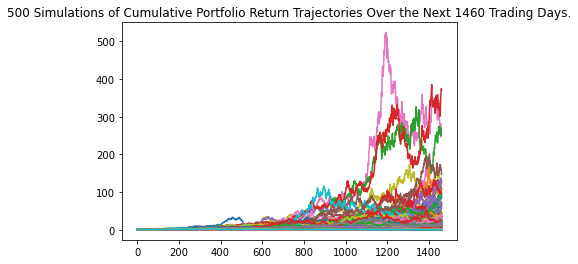

In [ ]:
# Visualize the 4 year Monte Carlo simulation with a line plot
MC_BTC_4_plot = MC_BTC_4.plot_simulation()

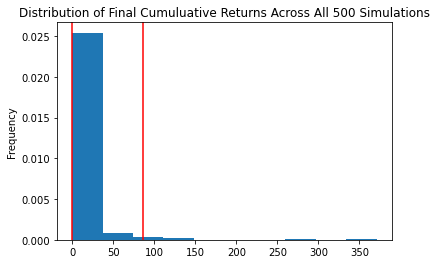

In [ ]:
# Visualize the probability distribution of the 4 year Monte Carlo simulation
MC_BTC_4_dist = MC_BTC_4.plot_distribution()

In [ ]:
# Generate summary statistics from the 4 year Monte Carlo simulation
MC_BTC_4_stats = MC_BTC_4.summarize_cumulative_return()

In [ ]:
# Review the summary statistics
print(MC_BTC_4_stats)

count           500.000000
mean             11.247926
std              29.354768
min               0.010137
25%               1.172813
50%               3.427053
75%               9.327603
max             370.825318
95% CI Lower      0.175225
95% CI Upper     85.898951
Name: 1460, dtype: float64


## Bitcoin vs the S&P500: Monte Carlo Simulations Pre-Pandemic

#### SPY

In [ ]:
# Configure the Monte Carlo simulation to forecast 2 years of SPY data beginning at start of the pandemic
MC_SPY_2 = MCSimulation(
    portfolio_data = spy_prices_covid_df,
    weights = [1],
    num_simulation = 100,
    num_trading_days = 252 * 2
)

# Review the simulation input data
MC_SPY_2.portfolio_data

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2018-02-20 05:00:00+00:00  272.00  273.6700  270.5000  271.40   87542178   
2018-02-21 05:00:00+00:00  271.85  274.7200  269.9400  270.05   99118727   
2018-02-22 05:00:00+00:00  271.09  273.0500  269.6400  270.40  110763169   
2018-02-23 05:00:00+00:00  271.84  274.7100  271.2500  274.71   93601887   
2018-02-26 05:00:00+00:00  275.90  278.0100  275.2600  277.90   87824222   
...                           ...       ...       ...     ...        ...   
2020-02-13 05:00:00+00:00  335.92  338.1200  335.5600  337.06   54496102   
2020-02-14 05:00:00+00:00  337.48  337.7300  336.2000  337.60   64582210   
2020-02-18 05:00:00+00:00  336.52  337.6677  335.2100  336.73   57342529   
2020-02-19 05:00:00+00:00  337.81  339.0800  337.4800  338.34   49765222   
2020-02-20 05:00:00+00:00  337.77  338.6400  333.6817  336.95   74170562   

                                                                
                          trade_count        vwap daily_return  
timestamp                                                       
2018-02-20 05:00:00+00:00      339897  272.115919          NaN  
2018-02-21 05:00:00+00:00      392252  271.984676    -0.004974  
2018-02-22 05:00:00+00:00      404227  270.918163     0.001296  
2018-02-23 05:00:00+00:00      321920  273.222367     0.015939  
2018-02-26 05:00:00+00:00      281802  276.766722     0.011612  
...                               ...         ...          ...  
2020-02-13 05:00:00+00:00      287288  337.048796    -0.001067  
2020-02-14 05:00:00+00:00      252426  337.149473     0.001602  
2020-02-18 05:00:00+00:00      286927  336.556062    -0.002577  
2020-02-19 05:00:00+00:00      221058  338.258804     0.004781  
2020-02-20 05:00:00+00:00      431813  336.373228    -0.004108  

[504 rows x 8 columns]

In [ ]:
# Run the Monte Carlo simulation to forecast 2 years cumulative returns beginning from start of the pandemic
MC_SPY_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.025180,0.991261,1.013350,0.995617,0.991309,0.993784,0.992089,0.993418,1.004803,0.987977,...,1.010512,0.990959,0.992373,0.991184,0.979268,1.009613,1.000631,0.990313,1.015195,0.991298
2,1.036108,0.984564,1.025414,0.984817,0.991494,0.990234,0.994183,0.980815,1.004424,0.984929,...,1.007580,0.987557,1.005985,0.992158,0.969199,1.008463,0.996927,0.975378,1.003212,0.987337
3,1.045133,0.979946,1.023890,0.994180,1.000946,0.987118,0.989219,0.972024,0.992185,0.987123,...,1.015782,0.980596,1.019624,0.988091,0.976244,1.005588,0.984485,0.967155,0.996120,0.994647
4,1.039448,0.966097,1.041626,1.006354,0.999594,0.977767,0.997348,0.973160,1.004576,0.984416,...,1.029708,0.975585,1.011712,0.977662,0.963239,1.005540,0.982691,0.975608,0.992270,1.002191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.346532,1.033952,1.930935,0.835856,1.496726,1.514911,1.290782,1.457035,1.083668,1.185707,...,1.085490,1.266903,1.078661,1.335173,1.012460,1.560175,1.184306,1.178673,1.229028,1.239880
501,1.347398,1.031101,1.919075,0.833073,1.482480,1.520651,1.290817,1.447627,1.100026,1.176551,...,1.062467,1.268453,1.083769,1.338995,0.987556,1.571808,1.190497,1.184379,1.246449,1.227435
502,1.358760,1.041057,1.965436,0.850650,1.489505,1.509859,1.281322,1.454064,1.111372,1.167779,...,1.065317,1.275749,1.073259,1.332559,0.978074,1.576714,1.203955,1.194777,1.247353,1.220409
503,1.357507,1.051883,1.939735,0.851304,1.502060,1.511321,1.283757,1.465489,1.108525,1.154959,...,1.079178,1.271975,1.077045,1.315037,0.991278,1.605711,1.181597,1.205992,1.240700,1.219988


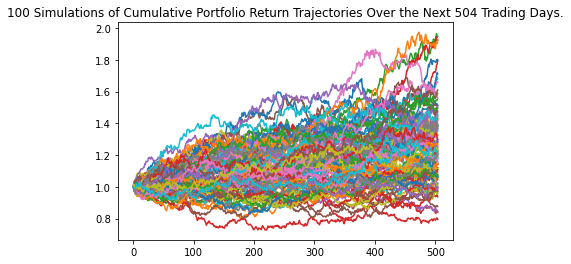

In [ ]:
# Visualize the 2 year Monte Carlo simulation with a line plot beginning from start of the pandemic
MC_SPY_2_plot = MC_SPY_2.plot_simulation()

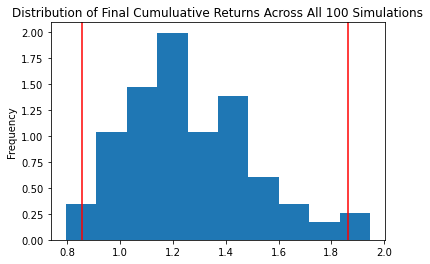

In [ ]:
# Visualize the probability distribution of the 2 year Monte Carlo simulation beginning from start of the pandemic
MC_SPY_2_dist = MC_SPY_2.plot_distribution()

In [ ]:
# Generate summary statistics from the 2 year Monte Carlo simulation beginning from start of the pandemic
MC_SPY_2_stats = MC_SPY_2.summarize_cumulative_return()

In [ ]:
# Review the summary statistics
print(MC_SPY_2_stats)

count           100.000000
mean              1.261369
std               0.244435
min               0.795031
25%               1.075834
50%               1.218129
75%               1.401472
max               1.946821
95% CI Lower      0.857922
95% CI Upper      1.864810
Name: 504, dtype: float64


In [ ]:
# Compare summary statistics from simulated daily returns to actual returns post-pandemic
spy_sim_vs_actual_data = {
    "actual": list(spy_actuals_df),
    "mean": list(MC_SPY_2.simulated_return.mean(axis=1)),
    "median": list(MC_SPY_2.simulated_return.median(axis=1)),
    "min": list(MC_SPY_2.simulated_return.min(axis=1)),
    "max": list(MC_SPY_2.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics vs actual
spy_df_sim_vs_actual = pd.DataFrame(spy_sim_vs_actual_data)

# Display dataframe
spy_df_sim_vs_actual

,actual,mean,median,min,max
0,0.989702,1.000000,1.000000,1.000000,1.000000
1,0.956878,1.000623,0.998556,0.973878,1.031444
2,0.927882,0.998986,0.998274,0.967462,1.036108
3,0.924470,0.999481,0.999570,0.954159,1.045133
4,0.882950,0.999316,1.000647,0.953174,1.048744
...,...,...,...,...,...
500,1.302923,1.257504,1.223588,0.789450,1.930935
501,1.323935,1.259018,1.229087,0.793644,1.945261
502,1.325419,1.259953,1.222595,0.802595,1.965436
503,1.297166,1.261079,1.218451,0.803426,1.939735


In [ ]:
# Use the `plot` function to visually analyze the trajectory of actual daily returns vs those from the two years of trading days simulation
spy_df_sim_vs_actual.hvplot(
    title="Simulated Daily Returns Behavior of SPY vs Actual Returns for first two years of Pandemic",
    xlabel="Time",
    ylabel="Returns",
    height=500,
    width=1000
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#### BTCUSD

In [ ]:
# Configure the Monte Carlo simulation to forecast 2 years of BTC data beginning at start of the pandemic
MC_BTC_2 = MCSimulation(
    portfolio_data = btc_prices_covid_df,
    weights = [1],
    num_simulation = 100,
    num_trading_days = 365 * 2
)

# Review the simulation input data
MC_BTC_2.portfolio_data

BTCUSD                                \
                               open      high       low     close   
timestamp                                                           
2018-02-20 06:00:00+00:00  11235.57  11279.99  10650.00  10824.54   
2018-02-21 06:00:00+00:00  10824.54  11180.02  10250.00  10454.27   
2018-02-22 06:00:00+00:00  10793.01  10900.00   9715.27   9830.00   
2018-02-23 06:00:00+00:00  10144.99  10494.14  10109.00  10445.44   
2018-02-24 06:00:00+00:00  10445.44  10489.26   9372.72   9688.62   
...                             ...       ...       ...       ...   
2020-02-15 06:00:00+00:00   9911.22  10048.34   9856.12   9955.13   
2020-02-16 06:00:00+00:00   9920.52   9969.38   9707.99   9774.14   
2020-02-17 06:00:00+00:00   9700.00   9818.60   9635.84   9797.19   
2020-02-18 06:00:00+00:00  10188.04  10205.05  10112.28  10139.63   
2020-02-19 06:00:00+00:00   9593.48   9653.10   9479.19   9564.27   

                                                                                
                                 volume trade_count          vwap daily_return  
timestamp                                                                       
2018-02-20 06:00:00+00:00  11175.461666       39045  10972.179893          NaN  
2018-02-21 06:00:00+00:00  16412.543664       62848  10603.722137    -0.034207  
2018-02-22 06:00:00+00:00  21180.658071       72211  10060.526301    -0.059714  
2018-02-23 06:00:00+00:00   4004.525634       16801  10362.638161     0.062608  
2018-02-24 06:00:00+00:00  14362.150847       56627   9767.080204    -0.072455  
...                                 ...         ...           ...          ...  
2020-02-15 06:00:00+00:00   1921.723180       13488   9981.502135    -0.027097  
2020-02-16 06:00:00+00:00   1868.943917       16573   9822.869803    -0.018181  
2020-02-17 06:00:00+00:00   2002.907268       14631   9748.514957     0.002358  
2020-02-18 06:00:00+00:00   2025.978187       13561  10154.892617     0.034953  
2020-02-19 06:00:00+00:00   3817.853056       20791   9567.428585    -0.056744  

[730 rows x 8 columns]

In [ ]:
# Run the Monte Carlo simulation to forecast 2 years cumulative returns beginning from start of the pandemic
MC_BTC_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.038044,0.983763,0.995409,1.016890,0.956460,1.014209,0.964819,0.987817,1.068663,1.108259,...,1.065112,1.004311,0.947191,1.021426,0.997359,0.967744,1.041490,1.016692,0.949481,0.983838
2,1.025930,0.909265,0.982384,0.911132,0.910851,0.972956,0.943955,1.013889,1.044192,1.079807,...,1.054347,1.005365,0.949151,1.008840,1.058132,0.919985,1.039828,1.042839,0.906810,0.983638
3,1.088016,0.897573,0.956305,0.948987,0.918450,0.948499,1.007754,0.957377,1.109181,1.055798,...,1.045759,0.997642,0.956238,1.016921,1.012631,0.876868,1.042830,1.036724,0.885283,0.974756
4,1.052373,0.896386,0.932012,0.926497,0.936937,0.941356,0.959943,0.917087,1.150888,1.016193,...,1.104145,1.019546,0.940932,1.056087,0.986174,0.856643,1.003574,1.102105,0.895772,0.985416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.963495,1.091127,2.123515,0.102669,2.315782,1.895945,0.322710,1.710154,0.452836,6.501688,...,1.579473,0.555133,4.235575,1.468551,0.295594,0.161647,0.491627,0.144598,9.053582,0.357649
727,2.058076,1.126749,2.009299,0.099830,2.367551,1.684040,0.322295,1.783441,0.500179,6.520113,...,1.569903,0.534368,4.277946,1.443748,0.296878,0.171659,0.485641,0.145794,9.274526,0.374373
728,1.973573,1.120542,1.965233,0.090622,2.421066,1.701649,0.334671,1.750808,0.491413,6.444462,...,1.641098,0.504449,4.088979,1.477416,0.283609,0.167760,0.527575,0.147599,8.937602,0.365926
729,1.978550,1.158749,2.079836,0.091567,2.435916,1.706290,0.289825,1.833699,0.468380,5.997716,...,1.661408,0.492345,4.226137,1.478041,0.281502,0.171285,0.531664,0.149243,9.162038,0.368096


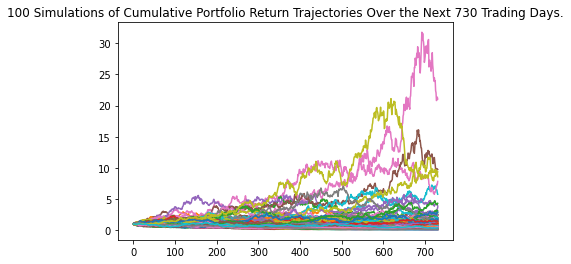

In [ ]:
# Visualize the 2 year Monte Carlo simulation with a line plot beginning from start of the pandemic
MC_BTC_2_plot = MC_BTC_2.plot_simulation()

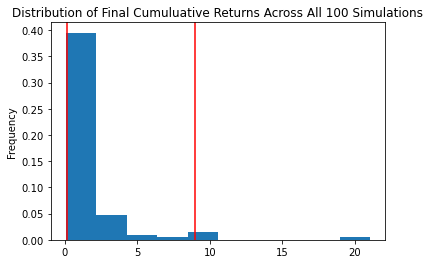

In [ ]:
# Visualize the probability distribution of the 2 year Monte Carlo simulation beginning from start of the pandemic
MC_BTC_2_dist = MC_BTC_2.plot_distribution()

In [ ]:
# Generate summary statistics from the 2 year Monte Carlo simulation beginning from start of the pandemic
MC_BTC_2_stats = MC_BTC_2.summarize_cumulative_return()

In [ ]:
# Review the summary statistics
print(MC_BTC_2_stats)

count           100.000000
mean              1.625288
std               2.685721
min               0.057495
25%               0.369300
50%               0.896011
75%               1.639321
max              21.060727
95% CI Lower      0.109864
95% CI Upper      8.996160
Name: 730, dtype: float64


In [ ]:
# Compare summary statistics from simulated daily returns to actual returns post-pandemic
btc_sim_vs_actual_data = {
    "actual": list(btc_actuals_df),
    "mean": list(MC_BTC_2.simulated_return.mean(axis=1)),
    "median": list(MC_BTC_2.simulated_return.median(axis=1)),
    "min": list(MC_BTC_2.simulated_return.min(axis=1)),
    "max": list(MC_BTC_2.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics vs actual
btc_df_sim_vs_actual = pd.DataFrame(btc_sim_vs_actual_data)

# Display dataframe
btc_df_sim_vs_actual

,actual,mean,median,min,max
0,1.000305,1.000000,1.000000,1.000000,1.000000
1,1.021388,0.997203,0.995617,0.878419,1.131850
2,1.008246,0.991153,0.986247,0.876764,1.181634
3,0.985770,0.993306,0.987841,0.874840,1.213791
4,0.948018,0.994775,0.989697,0.826812,1.225541
...,...,...,...,...,...
726,4.502453,1.622803,0.849690,0.054888,22.066889
727,4.194971,1.615430,0.845843,0.053822,20.807500
728,4.154331,1.618890,0.839905,0.053133,20.927226
729,4.061540,1.631971,0.877105,0.055055,21.367368


In [ ]:
# Use the `plot` function to visually analyze the trajectory of actual daily returns vs those from the two years of trading days simulation
btc_df_sim_vs_actual.hvplot(
    title="Simulated Daily Returns Behavior of BTC vs Actual Returns for first two years of Pandemic",
    xlabel="Time",
    ylabel="Returns",
    height=500,
    width=1000
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

## Closing Notes & Analysis